# Schroeder Problem 3.24 on Einstein solid

We'll combine functions from two of the past Jupyter notebooks to generate the table and graph for this problem.

In [1]:
import numpy as np
import math
from scipy.special import comb
import matplotlib.pyplot as plt

In [2]:
def ein_mult(N, q):
    """
    Calculate the Einstein solid multiplicity and return it as
     an integer.
    """
    return int(comb(q + N -1, q))  

In [3]:
def ein_entropy_over_k(N, q):
    """
    Calculate the Einstein solid entropy divided by k (so just the
      ln of the multiplicity).
    """
    return np.log(np.float64(ein_mult(N,q)))  

In [4]:
def convert_int(my_int, large=10**5):
    """
    If my_int is larger than large, return an exponential form.
      The right justification for ints should be log10(large) + 1.
    """
    if my_int > large:
        return "{: .1e}".format(my_int)
    else:
        return "{:>8}".format(int(my_int))

In [5]:
def round_to_n(num, sigfigs):
    """
    Round off num to the specifie number of sigfigs (significant figures)
    """
    if num == 0:
        return num
    else:
        return round(num, -int(math.floor(math.log10(abs(num)))) + (sigfigs - 1))   

In [6]:
def central_diff(array1, array2, index):
    """
    Calculate the derivative of array at index by central difference
    """
    return (array1[index + 1] - array1[index - 1]) / \
           (array2[index + 1] - array2[index - 1])

In [7]:
def forward_diff(array1, array2, index):
    """
    Calculate the derivative of array at index by forward difference
    """
    return (array1[index + 1] - array1[index]) / \
           (array2[index + 1] - array2[index])

In [8]:
def backward_diff(array1, array2, index):
    """
    Calculate the derivative of array at index by central difference
    """
    return (array1[index] - array1[index - 1]) / \
           (array2[index] - array2[index - 1])

In [9]:
def second_deriv(array, index):
    """
    Calculate the 2nd derivative of an array at index 
    """
    return ( array[index + 1] - 2 * array[index]  \
             + array[index - 1] )


In [10]:
def macrostate_table(N, q_tot, table=True):
    """
    Step through q from 0 to q_tot and use ein_mult 
      to find Omega. Then take numerical derivatives to find
      the temperature and heat capacity. 
      
    If table=False, don't print the table but return the arrays.
    """
    if table:
        print('   q   Omega    S_A/k  kT/eps  C/Nk ')
    # Collect values in arrays
    q_array = np.zeros(q_tot+1, dtype=int) 
    Omega_array = np.zeros(q_tot+1)  
    S_over_k_array = np.zeros(q_tot+1)  
    kT_over_eps_array = np.zeros(q_tot+1)  
    C_over_Nk_array = np.zeros(q_tot+1)
    C_over_Nk_array2 = np.zeros(q_tot+1)
    
    for q in range(q_tot+1):
        q_array[q] = q
        Omega_array[q] = ein_mult(N, q) 
        S_over_k_array[q] = ein_entropy_over_k(N, q) 
        
    # Find the temperature by central or forward/backward differences
    for q in range(q_tot+1):
        if q > 0 and q < q_tot:
            T = 1 / central_diff(S_over_k_array, q_array, q) 
        elif q == 0:
            T = 1 / forward_diff(S_over_k_array, q_array, q)
        elif q == q_tot:
            T = 1 / backward_diff(S_over_k_array, q_array, q)
        kT_over_eps_array[q] = T

    # Find C_over_Nk by central or forward/backward differences
    #  Two different methods tried
    for q in range(q_tot+1):
        if q > 0 and q < q_tot:
            CB = central_diff(q_array, kT_over_eps_array, q) 
            CB2 = -1 / second_deriv(S_over_k_array, q) \
                        / kT_over_eps_array[q]**2
        elif q == 0:
            CB = 0
            CB2 = 0
        elif q == q_tot:
            CB = 0
            CB2 = 0
        C_over_Nk_array[q] = CB / N
        C_over_Nk_array2[q] = CB2 / N
    
        
    if table:
        for q in range(q_tot+1):
            print (f'{q:> 4} {convert_int(Omega_array[q])}  {S_over_k_array[q]:5.1f}   ',
                   f'{kT_over_eps_array[q]:4.2f}   {C_over_Nk_array[q]:4.2f}   {C_over_Nk_array2[q]:4.2f}')

        return q_array, Omega_array, S_over_k_array, kT_over_eps_array, C_over_Nk_array, C_over_Nk_array2

In [11]:
q_array, Omega_array, S_over_k_array, kT_over_eps_array, C_over_Nk_array, C_over_Nk_array2 \
      = macrostate_table(50, 100)

   q   Omega    S_A/k  kT/eps  C/Nk 
   0        1    0.0    0.26   0.00   0.00
   1       50    3.9    0.28   0.55   0.38
   2     1275    7.2    0.33   0.45   0.48
   3    22100   10.0    0.37   0.54   0.55
   4  2.9e+05   12.6    0.40   0.59   0.60
   5  3.2e+06   15.0    0.44   0.64   0.64
   6  2.9e+07   17.2    0.47   0.67   0.68
   7  2.3e+08   19.3    0.49   0.70   0.71
   8  1.7e+09   21.2    0.52   0.73   0.73
   9  1.1e+10   23.1    0.55   0.75   0.75
  10  6.3e+10   24.9    0.58   0.77   0.77
  11  3.4e+11   26.6    0.60   0.78   0.78
  12  1.7e+12   28.2    0.63   0.80   0.80
  13  8.3e+12   29.7    0.65   0.81   0.81
  14  3.7e+13   31.3    0.68   0.82   0.82
  15  1.6e+14   32.7    0.70   0.83   0.83
  16  6.5e+14   34.1    0.73   0.84   0.84
  17  2.5e+15   35.5    0.75   0.85   0.85
  18  9.4e+15   36.8    0.77   0.85   0.85
  19  3.4e+16   38.1    0.80   0.86   0.86
  20  1.2e+17   39.3    0.82   0.87   0.87
  21  3.9e+17   40.5    0.84   0.87   0.87
  22  1.2e+18   4

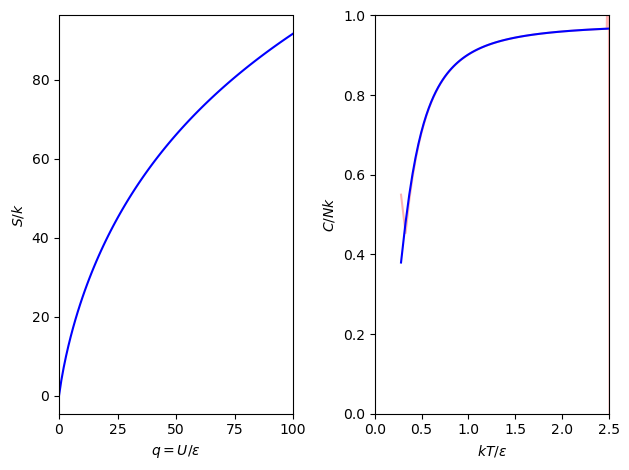

In [12]:
fig, axs = plt.subplots(1, 2)

axs[0].plot(q_array, S_over_k_array, color='blue')
axs[0].set_xlabel(r'$q = U/\varepsilon$')
axs[0].set_ylabel(r'$S/k$')
axs[0].set_xlim(q_array[0], q_array[-1]+.01)

axs[1].plot(kT_over_eps_array[1:], C_over_Nk_array[1:], color='red', alpha=0.3)
axs[1].plot(kT_over_eps_array[1:-1], C_over_Nk_array2[1:-1], color='blue')
axs[1].set_ylabel(r'$C/Nk$')
axs[1].set_xlabel(r'$kT/\varepsilon$')
axs[1].set_xlim(0, 2.5)
axs[1].set_ylim(0, 1)



fig.tight_layout();

In [13]:
q_array, Omega_array, S_over_k_array, kT_over_eps_array, C_over_Nk_array, C_over_Nk_array2 \
      = macrostate_table(5000, 100)

   q   Omega    S_A/k  kT/eps  C/Nk 
   0        1    0.0    0.12   0.00   0.00
   1     5000    8.5    0.12   0.03   0.02
   2  1.3e+07   16.3    0.13   0.03   0.03
   3  2.1e+10   23.8    0.14   0.04   0.04
   4  2.6e+13   30.9    0.14   0.04   0.04
   5  2.6e+16   37.8    0.15   0.05   0.05
   6  2.2e+19   44.5    0.15   0.06   0.06
   7  1.6e+22   51.1    0.15   0.06   0.06
   8  9.7e+24   57.5    0.16   0.07   0.07
   9  5.4e+27   63.9    0.16   0.07   0.07
  10  2.7e+30   70.1    0.16   0.08   0.08
  11  1.2e+33   76.2    0.16   0.08   0.09
  12  5.2e+35   82.2    0.17   0.09   0.09
  13  2.0e+38   88.2    0.17   0.09   0.09
  14  7.1e+40   94.1    0.17   0.10   0.10
  15  2.4e+43   99.9    0.17   0.10   0.10
  16  7.5e+45  105.6    0.17   0.11   0.11
  17  2.2e+48  111.3    0.18   0.11   0.11
  18  6.1e+50  116.9    0.18   0.12   0.12
  19  1.6e+53  122.5    0.18   0.12   0.12
  20  4.1e+55  128.0    0.18   0.12   0.12
  21  9.7e+57  133.5    0.18   0.13   0.13
  22  2.2e+60  13

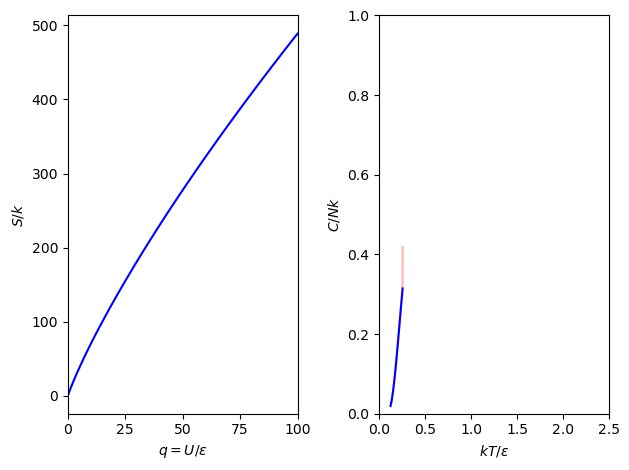

In [14]:
fig, axs = plt.subplots(1, 2)

axs[0].plot(q_array, S_over_k_array, color='blue')
axs[0].set_xlabel(r'$q = U/\varepsilon$')
axs[0].set_ylabel(r'$S/k$')
axs[0].set_xlim(q_array[0], q_array[-1]+.01)

axs[1].plot(kT_over_eps_array[1:-1], C_over_Nk_array[1:-1], color='red', alpha=0.3)
axs[1].plot(kT_over_eps_array[1:-1], C_over_Nk_array2[1:-1], color='blue')
axs[1].set_ylabel(r'$C/Nk$')
axs[1].set_xlabel(r'$kT/\varepsilon$')
axs[1].set_xlim(0, 2.5)
axs[1].set_ylim(0, 1)



fig.tight_layout();